In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [6]:
import requests
requests.__version__

'2.26.0'

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46b5180765b557381492a6d9a78cd8af


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto carreno
Processing Record 2 of Set 1 | pisco
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | port-cartier
Processing Record 5 of Set 1 | nanortalik
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | sabang
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | isangel
Processing Record 12 of Set 1 | saint anthony
Processing Record 13 of Set 1 | temyasovo
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | jiazi
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | laem sing
Processing Record 21 of Set 1 | chihuahua
Processing Record 22 of Set 1 | mataur

Processing Record 36 of Set 4 | elat
Processing Record 37 of Set 4 | tasiilaq
Processing Record 38 of Set 4 | sao joaquim
Processing Record 39 of Set 4 | ulaangom
Processing Record 40 of Set 4 | aquiraz
Processing Record 41 of Set 4 | touros
Processing Record 42 of Set 4 | tessalit
Processing Record 43 of Set 4 | shingu
Processing Record 44 of Set 4 | aden
Processing Record 45 of Set 4 | tautira
Processing Record 46 of Set 4 | ponta do sol
Processing Record 47 of Set 4 | dourbali
Processing Record 48 of Set 4 | krasnoyarsk-45
City not found. Skipping...
Processing Record 49 of Set 4 | maridi
Processing Record 50 of Set 4 | kendari
Processing Record 1 of Set 5 | hithadhoo
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | paamiut
Processing Record 4 of Set 5 | dicabisagan
Processing Record 5 of Set 5 | morant bay
Processing Record 6 of Set 5 | sao raimundo nonato
Processing Record 7 of Set 5 | la rioja
Processing Record 8 of Set 5 | qaanaaq
Processing Record 9 of Set 5 

Processing Record 25 of Set 8 | santa maria da vitoria
Processing Record 26 of Set 8 | suluq
Processing Record 27 of Set 8 | grindavik
Processing Record 28 of Set 8 | amderma
City not found. Skipping...
Processing Record 29 of Set 8 | assiniboia
Processing Record 30 of Set 8 | nyimba
Processing Record 31 of Set 8 | hualmay
Processing Record 32 of Set 8 | shu
Processing Record 33 of Set 8 | margate
Processing Record 34 of Set 8 | barbar
City not found. Skipping...
Processing Record 35 of Set 8 | luganville
Processing Record 36 of Set 8 | bambous virieux
Processing Record 37 of Set 8 | san patricio
Processing Record 38 of Set 8 | ciudad bolivar
Processing Record 39 of Set 8 | darhan
Processing Record 40 of Set 8 | rawson
Processing Record 41 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 8 | rustenburg
Processing Record 43 of Set 8 | kruisfontein
Processing Record 44 of Set 8 | puerto baquerizo moreno
Processing Record 45 of Set 8 | izazi
Processing Record 46

Processing Record 10 of Set 12 | mandurah
Processing Record 11 of Set 12 | krasnoturansk
Processing Record 12 of Set 12 | la palma
Processing Record 13 of Set 12 | kjollefjord
Processing Record 14 of Set 12 | waingapu
Processing Record 15 of Set 12 | januaria
Processing Record 16 of Set 12 | sao gabriel da cachoeira
Processing Record 17 of Set 12 | thap than
Processing Record 18 of Set 12 | kumla
Processing Record 19 of Set 12 | klaksvik
Processing Record 20 of Set 12 | victoria
Processing Record 21 of Set 12 | luba
Processing Record 22 of Set 12 | xinpu
Processing Record 23 of Set 12 | el alto
Processing Record 24 of Set 12 | belaya gora
Processing Record 25 of Set 12 | lewistown
Processing Record 26 of Set 12 | rapu-rapu
Processing Record 27 of Set 12 | bogen
Processing Record 28 of Set 12 | okha
Processing Record 29 of Set 12 | beremend
Processing Record 30 of Set 12 | ninghai
Processing Record 31 of Set 12 | narsaq
Processing Record 32 of Set 12 | lincoln
Processing Record 33 of Se

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Carreno,6.1890,-67.4859,77.77,82,48,4.47,CO,2022-04-08 11:12:08
1,Pisco,-13.7000,-76.2167,64.45,88,98,8.05,PE,2022-04-08 11:12:08
2,Jamestown,42.0970,-79.2353,37.71,80,100,4.61,US,2022-04-08 11:09:11
3,Port-Cartier,50.0334,-66.8654,33.75,90,100,16.11,CA,2022-04-08 11:12:09
4,Nanortalik,60.1432,-45.2371,26.71,87,44,7.76,GL,2022-04-08 11:12:09
5,Puerto Ayora,-0.7393,-90.3518,76.77,89,22,7.45,EC,2022-04-08 11:12:10
6,Ancud,-41.8697,-73.8203,48.22,90,25,3.56,CL,2022-04-08 11:12:10
7,Sabang,5.8933,95.3214,83.32,67,100,3.94,ID,2022-04-08 11:12:11
8,Faanui,-16.4833,-151.7500,81.68,76,55,18.57,PF,2022-04-08 11:12:11
9,Isangel,-19.5500,169.2667,80.35,84,86,8.14,VU,2022-04-08 11:12:11


In [12]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Carreno,CO,2022-04-08 11:12:08,6.1890,-67.4859,77.77,82,48,4.47
1,Pisco,PE,2022-04-08 11:12:08,-13.7000,-76.2167,64.45,88,98,8.05
2,Jamestown,US,2022-04-08 11:09:11,42.0970,-79.2353,37.71,80,100,4.61
3,Port-Cartier,CA,2022-04-08 11:12:09,50.0334,-66.8654,33.75,90,100,16.11
4,Nanortalik,GL,2022-04-08 11:12:09,60.1432,-45.2371,26.71,87,44,7.76
5,Puerto Ayora,EC,2022-04-08 11:12:10,-0.7393,-90.3518,76.77,89,22,7.45
6,Ancud,CL,2022-04-08 11:12:10,-41.8697,-73.8203,48.22,90,25,3.56
7,Sabang,ID,2022-04-08 11:12:11,5.8933,95.3214,83.32,67,100,3.94
8,Faanui,PF,2022-04-08 11:12:11,-16.4833,-151.7500,81.68,76,55,18.57
9,Isangel,VU,2022-04-08 11:12:11,-19.5500,169.2667,80.35,84,86,8.14


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

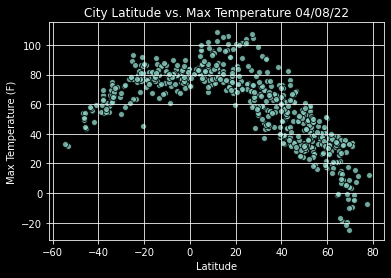

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

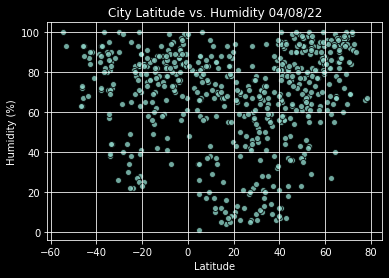

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

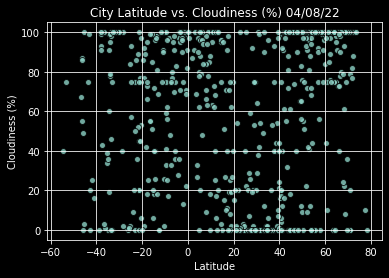

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

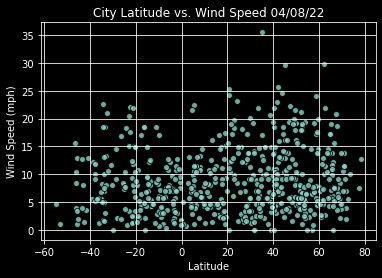

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Creating DataFrame from City_Data
index13 = city_data_df.loc[13]
index13

City                Mar Del Plata
Country                        AR
Date          2022-04-08 11:12:13
Lat                      -38.0023
Lng                      -57.5575
Max Temp                    66.09
Humidity                       93
Cloudiness                     93
Wind Speed                  11.99
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
581    False
582     True
583     True
584    False
585     True
Name: Lat, Length: 586, dtype: bool

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

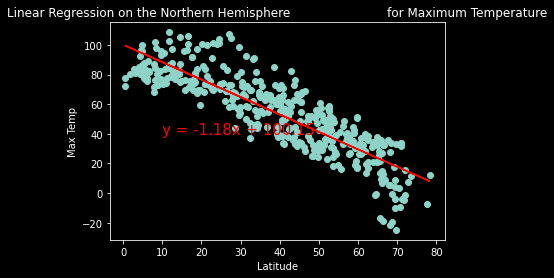

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

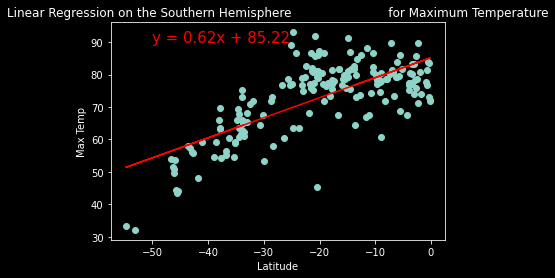

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

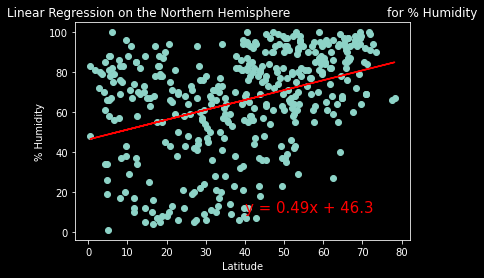

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

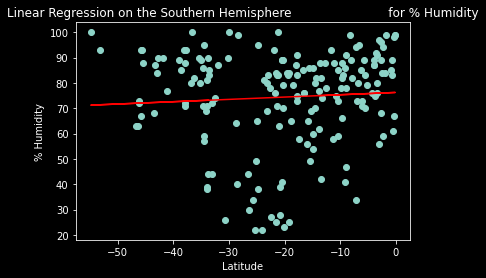

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

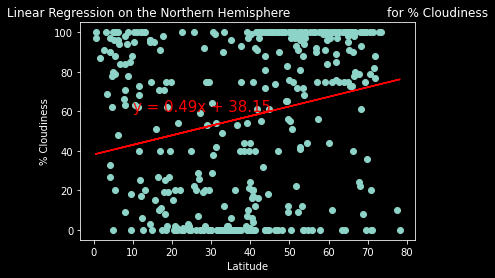

In [30]:
# Linear regression on Cloudiness for Northhern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

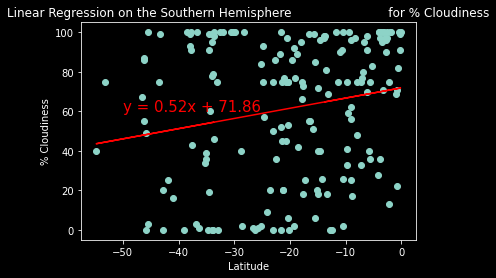

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

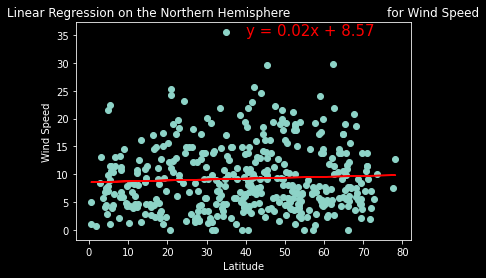

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

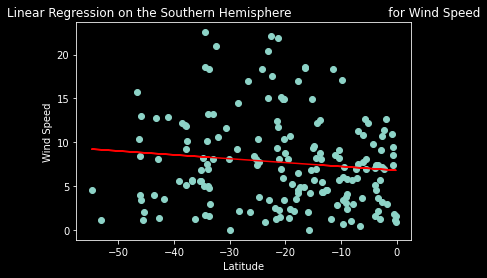

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))